In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from typing import Dict
import pickle as pk
from IPython.display import Image

# Reading The Cleaned Data Frames And Detailed Statistics File

In [25]:
df_cleaned = pd.read_csv('../data/cleaned_data.csv')
df_table = pd.read_csv("../data/Final League Table.csv")
df_table = df_table.set_index('Pos')
with open('../data/team_stats_detailed.pkl', 'rb') as f:
    team_stats_detailed = pk.load(f)

# Data Analysis And Vizualization

## *READ*
## The static plot display included below is only for viewing on GitHub since it does not support interactive Plotly plots; when running this notebook locally, simply use the fig.show() command, and the static display code can be safely ignored.

### Points growth

In [26]:
df_total_points = pd.DataFrame()

# Matchweeks (1–38)
df_total_points['MatchWeek'] = np.arange(1, 39)
# Add each team's total points column
for team, df in team_stats_detailed.items():
    df_total_points[team] = df['TotalPoints'].values

df_total_points = df_total_points.set_index('MatchWeek')
df_total_points.head()

,Arsenal,Aston Villa,Bournemouth,Brentford,Brighton,Chelsea,Crystal Palace,Everton,Fulham,Ipswich,Leicester,Liverpool,Man City,Man United,Newcastle,Nott'm Forest,Southampton,Tottenham,West Ham,Wolves
MatchWeek,,,,,,,,,,,,,,,,,,,,
1,3,3,1,3,3,0,0,0,0,0,1,3,3,3,3,1,0,1,0,0
2,6,3,2,3,6,3,0,0,3,0,1,6,6,3,4,4,0,4,3,0
3,7,6,5,6,7,4,1,0,4,1,1,9,9,3,7,5,0,4,3,1
4,10,9,5,6,8,7,2,0,5,2,2,9,12,6,10,8,0,4,4,1
5,11,12,5,6,9,10,3,1,8,3,3,12,13,7,10,9,1,7,4,1


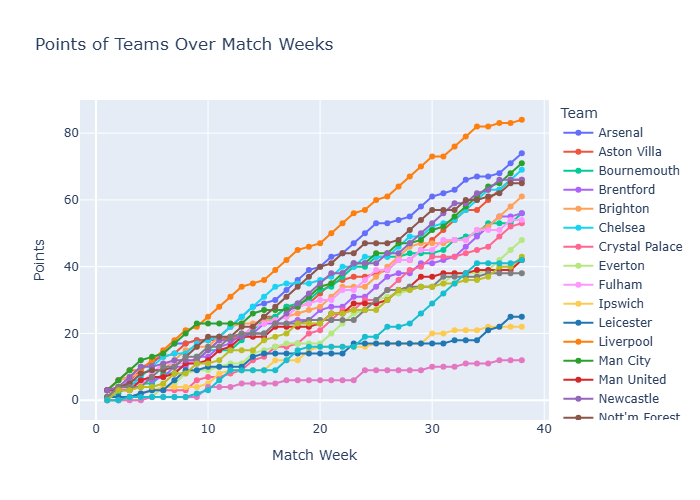

In [27]:
custom_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A",
    "#19D3F3", "#FF6692", "#B6E880", "#FF97FF", "#FECB52",
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
    "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF"
]
fig = px.line(df_total_points,
              title= 'Points of Teams Over Match Weeks',
              labels= {
                 'MatchWeek' : 'Match Week',
                 'value' : 'Points',
                 'variable' : 'Team'
              },
              markers= True,
              width = 1200,
              height= 600,
              color_discrete_sequence= custom_colors
              
             )
fig.write_image('../images/points_growth.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

### Goals Scored and Conceded by Each Team 

In [28]:
scored_home = df_cleaned.groupby('HomeTeam')['FTHG'].sum()
scored_away = df_cleaned.groupby('AwayTeam')['FTAG'].sum()

conceded_home = df_cleaned.groupby('HomeTeam')['FTAG'].sum()
conceded_away = df_cleaned.groupby('AwayTeam')['FTHG'].sum()

total_scored = scored_home.add(scored_away, fill_value=0)
total_conceded = conceded_home.add(conceded_away, fill_value=0)

df_goal_stats = pd.DataFrame({
    'Team': total_scored.index,
    'Scored': total_scored.values,
    'Conceded': total_conceded.values
})

df_goal_stats

,Team,Scored,Conceded
0,Arsenal,69,34
1,Aston Villa,58,51
2,Bournemouth,58,46
3,Brentford,66,57
4,Brighton,66,59
5,Chelsea,64,43
6,Crystal Palace,51,51
7,Everton,42,44
8,Fulham,54,54
9,Ipswich,36,82


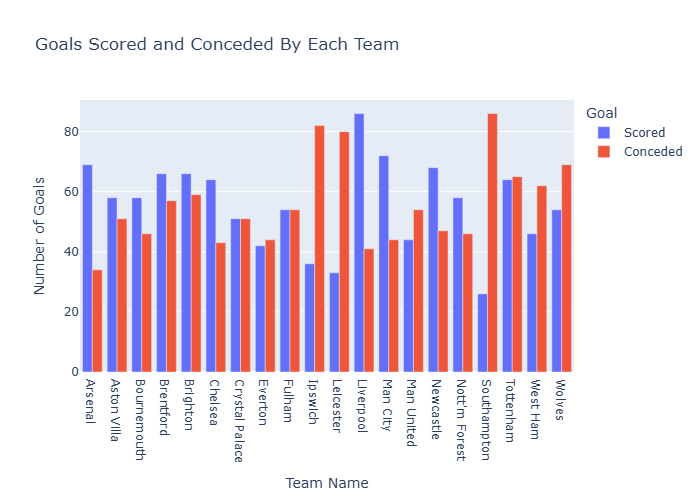

In [29]:
fig = px.bar(
    df_goal_stats,
    title='Goals Scored and Conceded By Each Team',
    x='Team',
    y=['Scored', 'Conceded'],   
    labels={
        'Team': 'Team Name',
        'Scored': 'Goals Scored',
        'Conceded': 'Goals Conceded',
        'value' : 'Number of Goals',
        'variable' : 'Goal'
    },
    barmode='group'
)
fig.write_image('../images/goals_s_c.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

### Fouls Committed By Each Team

In [30]:
home_fouls = (df_cleaned.copy()).groupby('HomeTeam')['HF'].sum() #taking only the home column

# Fouls committed when team is the away team
away_fouls = (df_cleaned.copy()).groupby('AwayTeam')['AF'].sum() #taking only the away column

# Combine both into a single Series (adding fouls for teams in both roles)
total_fouls = home_fouls.add(away_fouls, fill_value=0)

# Convert the Series to a DataFrame
df_team_fouls = total_fouls.reset_index()
df_team_fouls.columns = ['Team', 'Fouls Commited']

print(df_team_fouls)

              Team  Fouls Commited
0          Arsenal             400
1      Aston Villa             406
2      Bournemouth             514
3        Brentford             319
4         Brighton             438
5          Chelsea             436
6   Crystal Palace             417
7          Everton             430
8           Fulham             432
9          Ipswich             430
10       Leicester             420
11       Liverpool             430
12        Man City             287
13      Man United             413
14       Newcastle             394
15   Nott'm Forest             391
16     Southampton             459
17       Tottenham             446
18        West Ham             443
19          Wolves             480


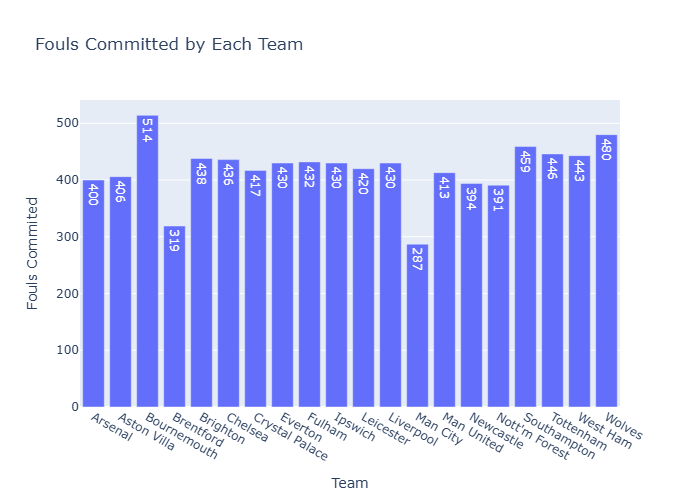

In [31]:
fig = px.bar(df_team_fouls,
             x = 'Team',
             y = 'Fouls Commited',
             title = 'Fouls Committed by Each Team',   
             text= df_team_fouls["Fouls Commited"],         
             barmode='group',
             height= 500,
             width = 1100,
             )
fig.write_image('../images/fouls_committed_bar.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

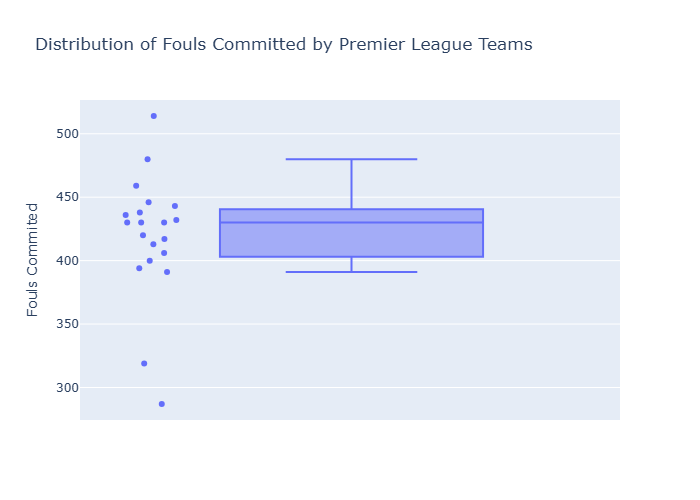

In [32]:
fig = px.box(df_team_fouls,
             y='Fouls Commited',
             points='all',
             hover_data=["Team"],
             title='Distribution of Fouls Committed by Premier League Teams')
fig.write_image('../images/fouls_committed_box.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

### Fouls Against Each Team

In [33]:
fouls_against_home = (df_cleaned.copy()).groupby('HomeTeam')['AF'].sum() #fouls against the team when home
fouls_against_away = (df_cleaned.copy()).groupby('AwayTeam')['HF'].sum() #fouls against the team when away

total_fouls_against = fouls_against_home.add(fouls_against_away, fill_value = 0)
df_fouls_against = total_fouls_against.reset_index()
df_fouls_against.columns = ['Team', 'Fouls Against']
df_fouls_against

,Team,Fouls Against
0,Arsenal,406
1,Aston Villa,509
2,Bournemouth,410
3,Brentford,365
4,Brighton,427
5,Chelsea,457
6,Crystal Palace,418
7,Everton,385
8,Fulham,371
9,Ipswich,414


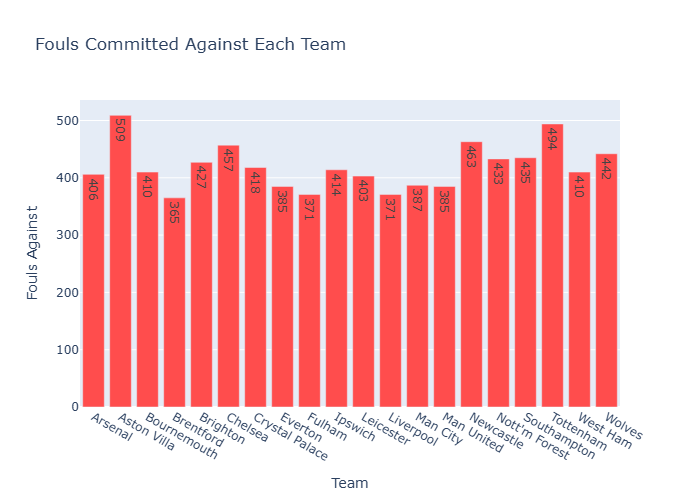

In [34]:
fig = px.bar(df_fouls_against,
             title='Fouls Committed Against Each Team',
             x = 'Team',
             y = 'Fouls Against',
             text= df_fouls_against["Fouls Against"],     
             color_discrete_sequence = ['#ff4d4d'],
             barmode='group',
             height= 500,
             width = 1100,
             )
fig.write_image('../images/fouls_against_bar.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

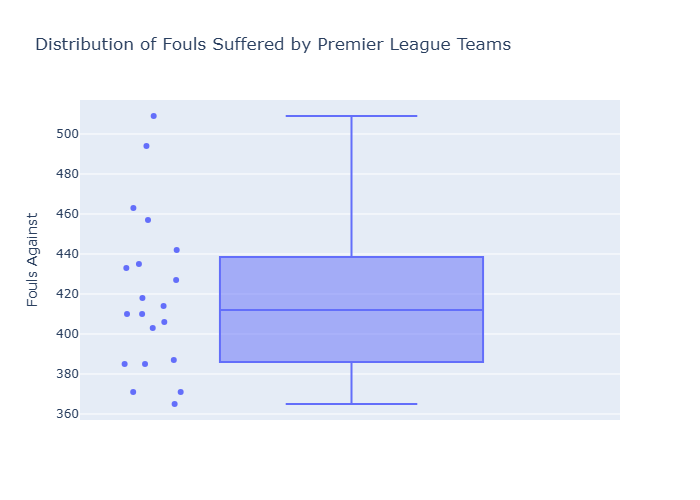

In [35]:
fig = px.box(df_fouls_against,
             y='Fouls Against',
             hover_data=["Team"],
             points='all',  # show individual data points
             title='Distribution of Fouls Suffered by Premier League Teams'
            )
fig.write_image('../images/fouls_against_box.png')
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

### Yellow And Red Cards Given By Each Referee

In [36]:
df_ref = df_cleaned[['Referee', 'HY', 'AY', 'HR', 'AR']].copy()

# Calculate total yellow cards and red cards per row
df_ref['Yellow Card'] = df_ref['HY'] + df_ref['AY']
df_ref['Red Card'] = df_ref['HR'] + df_ref['AR']

# Group by Referee and sum the total yellow and red cards
referee_cards = df_ref.groupby('Referee').agg({
    'Yellow Card': 'sum',
    'Red Card': 'sum'
})

print(referee_cards)

              Yellow Card  Red Card
Referee                            
A Kitchen               4         0
A Madley               86         1
A Taylor               88         6
C Kavanagh             96         5
C Pawson               94         3
D Bond                 55         1
D Coote                30         0
D England              79         4
D Webb                  7         0
J Brooks               86         1
J Gillett              68         0
J Smith                13         0
K Kavanagh              3         0
L Smith                26         1
M Oliver              108         5
M Salisbury            43         3
O Oliver                5         0
P Bankes               85         3
R Jones                93         4
S Allison               8         0
S Attwell              72         3
S Barrott             106         1
S Hooper              108         2
T Bramall              36         4
T Harrington           72         3
T Robinson             68   

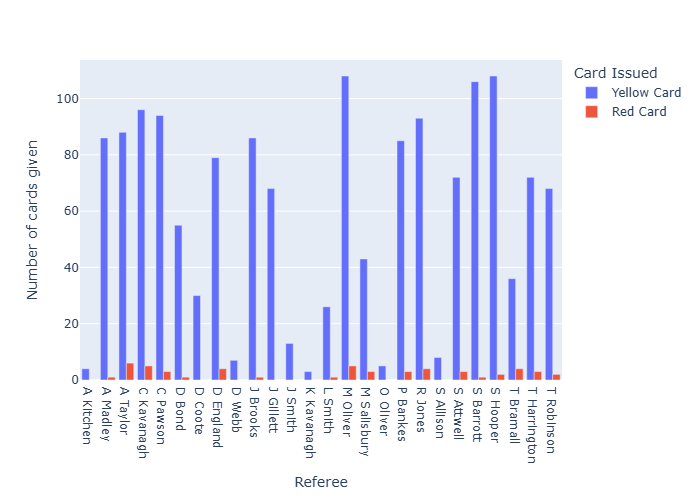

In [37]:
fig = px.bar(referee_cards, 
             barmode='group',
             labels={'value' : 'Number of cards given',
                     'variable' : 'Card Issued',
                     }
             )
fig.show()
img_bytes = fig.to_image(format="png")
display(Image(img_bytes))

# Final League Data Report

In [38]:
winner = df_table.iloc[0,0]
most_goals_scored = (df_table.sort_values('GF', ascending= False)).iloc[0,0]
most_goals_conceded = (df_table.sort_values('GA', ascending= False)).iloc[0,0]
most_fouls_committed  = (df_team_fouls.sort_values('Fouls Commited', ascending= False)).iloc[0,0]
least_fouls_committed = (df_team_fouls.sort_values('Fouls Commited')).iloc[0,0]
most_fouls_against  = (df_fouls_against.sort_values('Fouls Against', ascending= False)).iloc[0,0]
least_fouls_against = (df_fouls_against.sort_values('Fouls Against')).iloc[0,0]
most_yellow_cards_given_by = referee_cards.sort_values('Yellow Card', ascending= False).index[0]
least_yellow_cards_given_by = referee_cards.sort_values('Yellow Card').index[0]
most_red_cards_given_by = referee_cards.sort_values('Red Card', ascending= False).index[0]
least_red_cards_given_by = referee_cards.sort_values('Red Card').index[0]

summary_data = {
    'Statistic': [
        'Winner',
        'Most Goals Scored',
        'Most Goals Conceded',
        'Most Fouls Committed',
        'Least Fouls Committed',
        'Most Fouls Against',
        'Least Fouls Against',
        'Most Yellow Cards Given By',
        'Least Yellow Cards Given By',
        'Most Red Cards Given By',
        'Least Red Cards Given By'
    ],
    'Name': [
        winner,
        most_goals_scored,
        most_goals_conceded,
        most_fouls_committed,
        least_fouls_committed,
        most_fouls_against,
        least_fouls_against,
        most_yellow_cards_given_by,
        least_yellow_cards_given_by,
        most_red_cards_given_by,
        least_red_cards_given_by
    ],
    'Value': [
        df_table.loc[df_table['Team'] == winner, 'Points'].values[0],
        df_table.loc[df_table['Team'] == most_goals_scored, 'GF'].values[0],
        df_table.loc[df_table['Team'] == most_goals_conceded, 'GA'].values[0],
        df_team_fouls.loc[df_team_fouls['Team'] == most_fouls_committed, 'Fouls Commited'].values[0],
        df_team_fouls.loc[df_team_fouls['Team'] == least_fouls_committed, 'Fouls Commited'].values[0],
        df_fouls_against.loc[df_fouls_against['Team'] == most_fouls_against, 'Fouls Against'].values[0],
        df_fouls_against.loc[df_fouls_against['Team'] == least_fouls_against, 'Fouls Against'].values[0],
        referee_cards.loc[most_yellow_cards_given_by, 'Yellow Card'],
        referee_cards.loc[least_yellow_cards_given_by, 'Yellow Card'],
        referee_cards.loc[most_red_cards_given_by, 'Red Card'],
        referee_cards.loc[least_red_cards_given_by, 'Red Card']
    ]
}

df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.set_index('Statistic')
df_summary.to_csv('../data/League Report.csv')
df_summary


,Name,Value
Statistic,,
Winner,Liverpool,84
Most Goals Scored,Liverpool,86
Most Goals Conceded,Southampton,86
Most Fouls Committed,Bournemouth,514
Least Fouls Committed,Man City,287
Most Fouls Against,Aston Villa,509
Least Fouls Against,Brentford,365
Most Yellow Cards Given By,S Hooper,108
Least Yellow Cards Given By,K Kavanagh,3
